In [1]:
import pandas as pd
import seaborn as sns

import warnings; warnings.simplefilter('ignore')

%matplotlib inline

The line below calls the package manager for Python pip and installs a package. We only want to do this once.

The first time you run this notebook please uncomment this line and then comment it again to avoid unneccessary installs and checks. You could also use anaconda or pip from the command line to permanently install the package.

In [2]:
 !pip install aequitas

In [3]:
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap

In [4]:
df = pd.read_csv("https://github.com/dssg/aequitas/raw/master/examples/data/compas_for_aequitas.csv")

#### Task 1: Check the contents of the data file in terms of both, attributes-values and number of rows

In [5]:
# Your code for task 1
# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

First few rows of the dataframe:
   entity_id  score  label_value              race   sex          age_cat
0          1    0.0            0             Other  Male  Greater than 45
1          3    0.0            1  African-American  Male          25 - 45
2          4    0.0            1  African-American  Male     Less than 25
3          5    1.0            0  African-American  Male     Less than 25
4          6    0.0            0             Other  Male          25 - 45


In [6]:
# Check the number of rows and columns in the dataframe
print("\nNumber of rows and columns:")
print(df.shape)


Number of rows and columns:
(7214, 6)


In [7]:
# Set up a diverging color palette for visualization
aq_palette = sns.diverging_palette(225, 35, n=2)

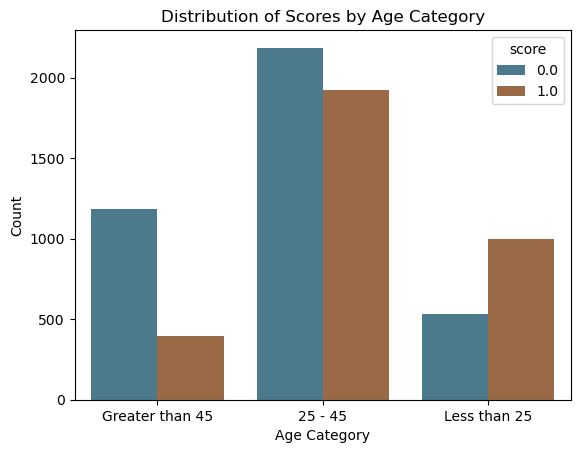

In [8]:
# Plot count of scores by age category
import matplotlib.pyplot as plt
by_age = sns.countplot(x="age_cat", hue="score", data=df, palette=aq_palette)

# Add title and labels
plt.title('Distribution of Scores by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')

# Display the plot
plt.show()

#### Task 2: Study the histogram as depicted above and try to interpret the histogram. What is the intention of the data scientist in this case? Subsequently, check the distributions for the same attribute, this time, however, in relation to what has really happened and state your observations by also explaining an indication of a potential bias in the model.

**Your answer for task 2 in this cell:**

<span style="color:blue">
The intention of data scientist's histogram was to represent how model scores were distributed among various age groups. The data scientist wants to see how the model's predictions change with age by looking at the distribution of scores. Understanding whether age groups are more likely to earn high or low scores—which may point to patterns or biases in the model's predictions—is made easier with the help of this analysis. The ultimate objective is to assess the model's performance and pinpoint any discrepancies that might require more research or mitigation.
    
Through the histogram, the data scientist endeavors to unravel how age influences the distribution of model scores. By segmenting the data into age categories, the intention is to discern any discernible patterns or discrepancies in the model's predictions across different age groups. This exploration is vital for uncovering potential biases or trends that may require further investigation or model refinement.
    
By looking at trends at the histogram, it's evident that individuals aged between 25 and 45 constitute the largest count >=2000. Within this age range, there's consistency in scoring with slight fluctuations. Conversely, the counts for individuals under 25 and over 45 are roughly half of that of the middle-aged group. Those under 25 predominantly achieve a score of 1.0, with nearly 1000, while the count for a score of 0.0 is approximately half of this. Conversely, for individuals over 45, the trend is reversed. This analysis suggests a distinct age-based pattern in scoring distribution, with the highest count and a particular scoring trend observed among individuals aged 25 to 45.
</span>

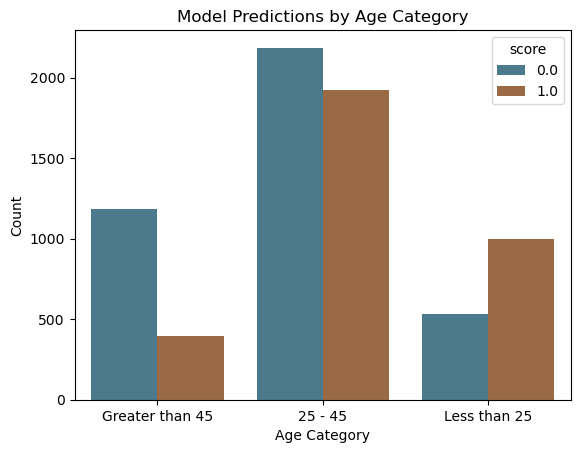

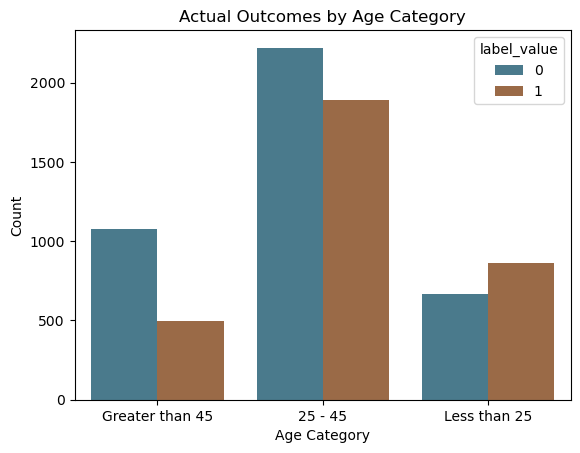

Bias Analysis (Actual - Expected):
age_cat          score
25 - 45          0.0     -0.008440
                 1.0      0.008440
Greater than 45  0.0      0.209800
                 1.0     -0.209800
Less than 25     1.0      0.193568
                 0.0     -0.193568
Name: proportion, dtype: float64


In [9]:
# Your code for task 2

# Visualize the count of scores by age category
by_age_score = sns.countplot(x="age_cat", hue="score", data=df, palette=aq_palette)
plt.title('Model Predictions by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of actual outcomes (label_value) by age category
by_age_outcome = sns.countplot(x="age_cat", hue="label_value", data=df, palette=aq_palette)
plt.title('Actual Outcomes by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

# Bias Analysis: Compare actual versus expected proportions of scores by age category
expected_proportions = df['score'].value_counts(normalize=True)  # Calculate expected proportions based on overall distribution
observed_proportions = df.groupby('age_cat')['score'].value_counts(normalize=True)  # Calculate observed proportions by age category

bias_analysis = observed_proportions - expected_proportions  # Calculate the bias analysis

print("Bias Analysis (Actual - Expected):")
print(bias_analysis)



<span style="color:blue">
    
**Interpretation of Bias Analysis(Actual - Expected):**

As per my understanding, here the bias analysis compares the actual proportions of scores in each age category with the expected proportions based on the overall distribution of scores. It helps identify discrepancies that may indicate biases in the model predictions.

- Negative values indicate that the actual proportions are lower than expected, suggesting that certain age groups receive fewer predicted scores than anticipated based on the overall distribution. This may point to a bias against those age groups in the model predictions.
- Positive values indicate that the actual proportions are higher than expected, implying that certain age groups receive more predicted scores than anticipated. This may indicate a bias favoring those age groups in the model predictions.

For instance, in the 'Greater than 45' age category, the model tends to predict more individuals with a score of 0 than expected, indicating a potential bias against this age group. Similarly, in the 'Less than 25' age category, the model predicts more individuals with a score of 1 than expected, suggesting a potential bias favoring this age group.

By interpreting the bias analysis, we can assess the fairness and reliability of the model predictions across different age categories, enabling informed decisions regarding model improvements or adjustments.

</span>

#### Task 3: Repeat the previous explorations. this time, however, for the other two attributes: race and gender. Susequently, interpret  the results and explain any indication of a potential bias in the model.

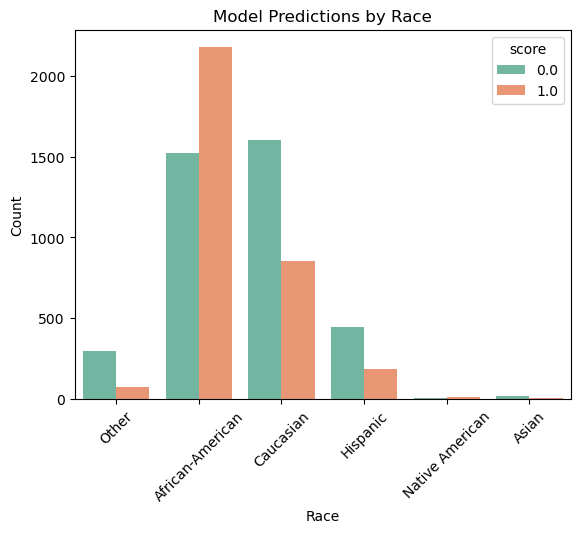

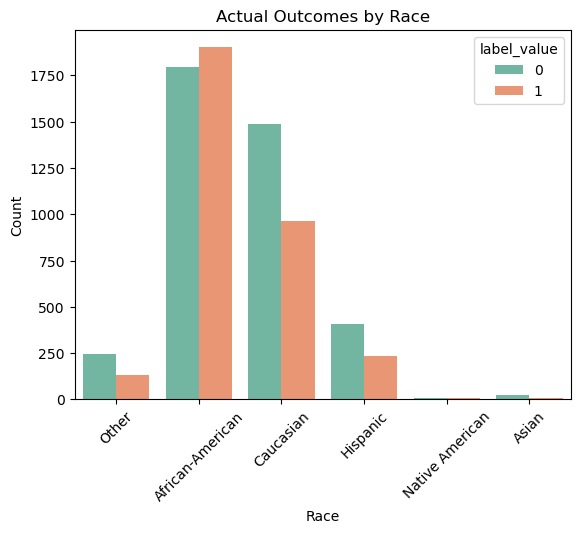

In [10]:

# Task 3: Explore distributions by race and gender
# Visualize the count of model scores by race
by_race_score = sns.countplot(x="race", hue="score", data=df, palette="Set2")
plt.title('Model Predictions by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualize the count of actual outcomes by race
by_race_outcome = sns.countplot(x="race", hue="label_value", data=df, palette="Set2")
plt.title('Actual Outcomes by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



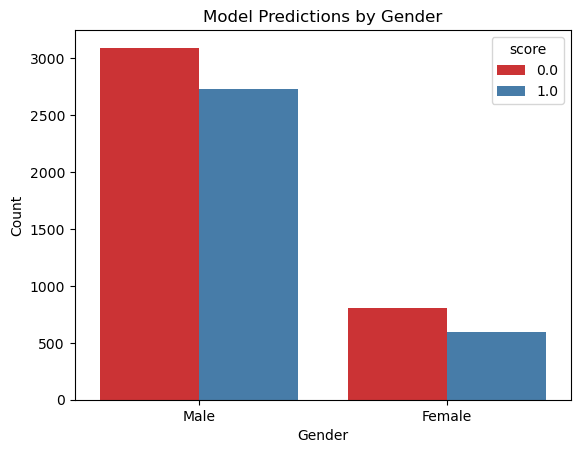

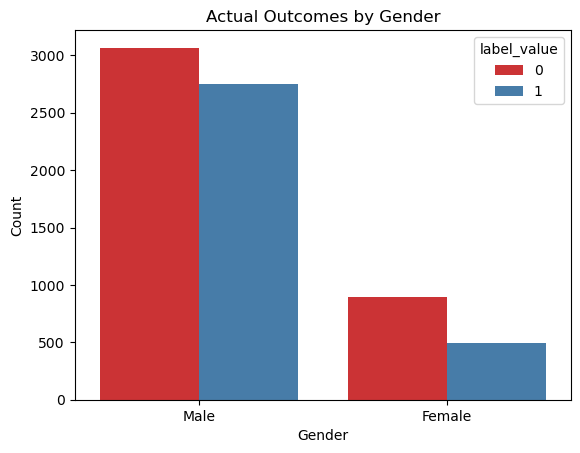

In [11]:

# Visualize the count of model scores by gender
by_gender_score = sns.countplot(x="sex", hue="score", data=df, palette="Set1")
plt.title('Model Predictions by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualize the count of actual outcomes by gender
by_gender_outcome = sns.countplot(x="sex", hue="label_value", data=df, palette="Set1")
plt.title('Actual Outcomes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [12]:
g = Group()
xtab, _ = g.get_crosstabs(df)

In [13]:
absolute_metrics = g.list_absolute_metrics(xtab)

In [14]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,3317,race,African-American,2174,1522,805,532,990,1369,1901,1795,3696,7214
1,0,binary 0/1,3317,race,Asian,8,24,2,3,21,6,9,23,32,7214
2,0,binary 0/1,3317,race,Caucasian,854,1600,349,461,1139,505,966,1488,2454,7214
3,0,binary 0/1,3317,race,Hispanic,190,447,87,129,318,103,232,405,637,7214
4,0,binary 0/1,3317,race,Native American,12,6,3,1,5,9,10,8,18,7214
5,0,binary 0/1,3317,race,Other,79,298,36,90,208,43,133,244,377,7214
6,0,binary 0/1,3317,sex,Female,591,804,288,195,609,303,498,897,1395,7214
7,0,binary 0/1,3317,sex,Male,2726,3093,994,1021,2072,1732,2753,3066,5819,7214
8,0,binary 0/1,3317,age_cat,25 - 45,1924,2185,741,706,1479,1183,1889,2220,4109,7214
9,0,binary 0/1,3317,age_cat,Greater than 45,394,1182,181,285,897,213,498,1078,1576,7214


In [15]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,race,African-American,0.64,0.72,0.55,0.35,0.37,0.45,0.28,0.65,0.63,0.66,0.59,0.51
1,race,Asian,0.84,0.67,0.91,0.12,0.25,0.09,0.33,0.88,0.75,0.00,0.25,0.28
2,race,Caucasian,0.67,0.52,0.77,0.29,0.41,0.23,0.48,0.71,0.59,0.26,0.35,0.39
3,race,Hispanic,0.66,0.44,0.79,0.29,0.46,0.21,0.56,0.71,0.54,0.06,0.30,0.36
4,race,Native American,0.78,0.90,0.62,0.17,0.25,0.38,0.10,0.83,0.75,0.00,0.67,0.56
5,race,Other,0.67,0.32,0.85,0.30,0.46,0.15,0.68,0.70,0.54,0.02,0.21,0.35
6,sex,Female,0.65,0.61,0.68,0.24,0.49,0.32,0.39,0.76,0.51,0.18,0.42,0.36
7,sex,Male,0.65,0.63,0.68,0.33,0.36,0.32,0.37,0.67,0.64,0.82,0.47,0.47
8,age_cat,25 - 45,0.65,0.63,0.67,0.32,0.39,0.33,0.37,0.68,0.61,0.58,0.47,0.46
9,age_cat,Greater than 45,0.70,0.43,0.83,0.24,0.46,0.17,0.57,0.76,0.54,0.12,0.25,0.32


<span style="color:blue">
Interpreting the results from the explorations of distributions by race and gender:
   

1. **Model Predictions by Race:**
 The model distributes scores among different racial groups, where African Americans have the highest count, surpassing 2000, while Caucasians exhibit a relatively lower count. Hispanic and other racial groups show counts below 250, with Native Americans and Asians having minimal counts.
    
2. **Actual Outcomes by Race:**
 The column chart depicting counts by race shows a comparable pattern to the Model Predictions by race. However, the count values differ when comparing race group counts with label outcomes.
    
3. **Model Predictions by Gender:**
 When examining gender alongside their corresponding scores, males demonstrate the highest count values, approximately 3000, whereas females exhibit a count approximately one-third of that of males.

4. **Actual Outcomes by Gender:**
This visualization displays the actual distribution of recidivism outcomes across genders. Comparing this with the model's predictions enables the identification of any discrepancies.

In summary, careful analysis of model predictions, actual outcomes, and evaluation metrics by race and gender can help identify potential biases in the model's decision-making process. Addressing these biases is essential for building fair and equitable AI systems.



#### Task 4: Study the two tables above with the metrics and suggest those metrics, which may further indicate bias by constrasting groups for the attribute "race" and "age_cat". As a guidance for the selected metrics, you should consider the model and its application as being a "punitive example" rather than an "assistive" one. Justify your answer regarding indicative bias. You should also give the definition for each selected metric.

**Your answer for task 4 in this cell:**

<span style="color:blue">    
To identify potential biases in the model's predictions concerning the attributes "race" and "age_cat," we'll examine the provided metrics and select those that may indicate bias, considering the model's punitive application nature.

**False Discovery Rate (FDR):** FDR measures the proportion of predicted positive cases (e.g., high-risk individuals) that are actually false positives. For example, if the FDR for a particular racial group is high, it suggests that a significant portion of individuals from that group are incorrectly classified as high-risk, potentially leading to unjustified punitive actions.
False Negative Rate (FNR): FNR calculates the proportion of actual positive cases (e.g., individuals who actually reoffend) that are incorrectly predicted as negative by the model. A high FNR for a specific group implies that the model frequently fails to identify high-risk individuals from that group, potentially leading to leniency and overlooking actual risks.
Positive Predictive Rate (PPR): PPR measures the proportion of correctly predicted positive cases (e.g., high-risk individuals) out of all cases predicted as positive by the model. A significant difference in PPR across racial or age groups suggests unequal predictive accuracy, indicating potential bias in the model's ability to identify high-risk individuals accurately.
Considering these metrics, let's analyze the table results:

**For the attribute "race":**

**FDR values:** Higher FDR values for certain racial groups indicate a higher rate of false positives, potentially leading to unjust punitive actions against those groups.
FNR values: Higher FNR values suggest that certain racial groups are more likely to have actual high-risk individuals misclassified as low-risk, leading to leniency.
**PPR values:** Discrepancies in PPR values across racial groups may suggest unequal predictive accuracy, indicating potential bias in the model's predictions for different racial groups.
For the attribute "age_cat":

Similar considerations apply to FDR, FNR, and PPR values for different age categories. Higher FDR and FNR values for specific age categories indicate potential bias in the model's predictions for different age groups.
Variations in PPR values across age categories may suggest unequal predictive accuracy, indicating potential bias in the model's ability to identify high-risk individuals accurately across different age groups.
Intersectional Analysis: Additionally, we should consider how biases might compound or interact differently for individuals who belong to multiple marginalized groups, such as older individuals from minority racial groups. This intersectional analysis can provide deeper insights into the complexities of bias in the model's predictions.

**Recommendations for Mitigation:** To mitigate identified biases, strategies such as collecting more diverse training data, implementing fairness-aware algorithms, and adjusting decision thresholds for different demographic groups should be considered. These measures can help improve the fairness and accuracy of the model's predictions.

**Acknowledgment of Limitations:** It's important to acknowledge the limitations of this analysis, including the reliance on provided metrics and the potential for other forms of bias not captured by these metrics. A comprehensive approach to fairness assessment should involve continuous monitoring and evaluation of model performance in real-world contexts.

By incorporating these enhancements, we can deepen our understanding of potential biases in the model's predictions and take proactive steps to address them, ensuring fairness and accuracy in decision-making processes.

</span>

#### Task 5: In the following, fill in the missing pieces of code to the disparities among all possible groups and for all of the above metrics. Disparities are calculated as a ratio of a metric for a group of interest compared to a base group. In our case, you should set the follwoing groups as base rate: Caucasian / Male /  Age 25-45.

In [16]:
b = Bias()


In [17]:
bdf = b.get_disparity_predefined_groups(xtab, original_df=df,
                                       ref_groups_dict = {'race': 'Caucasian', 'sex': 'Male', 'age_cat': '25 - 45'},
                                        alpha=0.05, check_significance=True,
                                        mask_significance=True)
bdf.style


,model_id,score_threshold,k,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,label_value_significance,score_significance,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,3317,race,African-American,0.638258,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,2174,1522,0.655412,0.588203,805,532,990,1369,1901,1795,3696,7214,0.514340,True,True,0.906085,Caucasian,False,0.586416,Caucasian,True,1.213154,Caucasian,True,1.912093,Caucasian,False,0.913728,Caucasian,True,2.545667,Caucasian,True,1.690224,Caucasian,True,1.064904,Caucasian,False,0.720526,Caucasian,False,1.377549,Caucasian,True
1,0,binary 0/1,3317,race,Asian,0.843750,0.666667,0.913043,0.125000,0.250000,0.086957,0.333333,0.875000,0.750000,8,24,0.002412,0.250000,2,3,21,6,9,23,32,7214,0.281250,False,False,0.611748,Caucasian,False,0.698482,Caucasian,False,0.433839,Caucasian,False,0.370749,Caucasian,False,1.229148,Caucasian,False,0.009368,Caucasian,False,0.718384,Caucasian,False,1.268317,Caucasian,False,1.192808,Caucasian,False,1.275248,Caucasian,False
2,0,binary 0/1,3317,race,Caucasian,0.669927,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,854,1600,0.257462,0.348003,349,461,1139,505,966,1488,2454,7214,0.393643,False,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False
3,0,binary 0/1,3317,race,Hispanic,0.660911,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,190,447,0.057281,0.298273,87,129,318,103,232,405,637,7214,0.364207,False,True,1.120464,Caucasian,False,1.165140,Caucasian,False,1.001616,Caucasian,False,0.915887,Caucasian,False,0.999346,Caucasian,False,0.222482,Caucasian,True,0.857099,Caucasian,True,0.916748,Caucasian,False,1.025773,Caucasian,False,0.849249,Caucasian,False
4,0,binary 0/1,3317,race,Native American,0.777778,0.900000,0.625000,0.166667,0.250000,0.375000,0.100000,0.833333,0.750000,12,6,0.003618,0.666667,3,1,5,9,10,8,18,7214,0.555556,False,True,0.611748,Caucasian,False,0.209544,Caucasian,False,0.578453,Caucasian,False,1.598854,Caucasian,False,1.170618,Caucasian,False,0.014052,Caucasian,True,1.915691,Caucasian,True,1.268317,Caucasian,False,0.816506,Caucasian,False,1.721584,Caucasian,False
5,0,binary 0/1,3317,race,Other,0.665782,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,79,298,0.023817,0.209549,36,90,208,43,133,244,377,7214,0.352785,False,True,1.115085,Caucasian,False,1.417970,Caucasian,False,1.048203,Caucasian,False,0.629057,Caucasian,False,0.980490,Caucasian,False,0.092506,Caucasian,True,0.602147,Caucasian,True,0.920466,Caucasian,False,1.113660,Caucasian,False,0.618447,Caucasian,False
6,0,binary 0/1,3317,sex,Female,0.653763,0.608434,0.678930,0.242537,0.487310,0.321070,0.391566,0.757463,0.512690,591,804,0.178173,0.423656,288,195,609,303,498,897,1395,7214,0.356989,True,True,1.336425,Male,True,1.055810,Male,True,0.734738,Male,True,0.990343,Male,True,1.130710,Male,True,0.216801,Male,True,0.904348,Male,True,0.806925,Male,True,1.004633,Male,True,0.967101,Male,True
7,0,binary 0/1,3317,sex,Male,0.653721,0.629132,0.675799,0.330100,0.364637,0.324201,0.370868,0.669900,0.635363,2726,3093,0.821827,0.468465,994,1021,2072,1732,2753,3066,5819,7214,0.473105,False,False,1.00000

In [18]:
# View disparity metrics added to dataframe
bdf[['attribute_name', 'attribute_value'] +
     b.list_disparities(bdf) + b.list_significance(bdf)].style



,attribute_name,attribute_value,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity,label_value_significance,score_significance,fdr_significance,fnr_significance,for_significance,fpr_significance,npv_significance,ppr_significance,pprev_significance,precision_significance,tnr_significance,tpr_significance
0,race,African-American,0.906085,0.586416,1.213154,1.912093,0.913728,2.545667,1.690224,1.064904,0.720526,1.377549,True,True,False,True,True,False,True,True,True,False,False,True
1,race,Asian,0.611748,0.698482,0.433839,0.370749,1.229148,0.009368,0.718384,1.268317,1.192808,1.275248,False,False,False,False,False,False,False,False,False,False,False,False
2,race,Caucasian,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
3,race,Hispanic,1.120464,1.165140,1.001616,0.915887,0.999346,0.222482,0.857099,0.916748,1.025773,0.849249,False,True,False,False,False,False,False,True,True,False,False,False
4,race,Native American,0.611748,0.209544,0.578453,1.598854,1.170618,0.014052,1.915691,1.268317,0.816506,1.721584,False,True,False,False,False,False,False,True,True,False,False,False
5,race,Other,1.115085,1.417970,1.048203,0.629057,0.980490,0.092506,0.602147,0.920466,1.113660,0.618447,False,True,False,False,False,False,False,True,True,False,False,False
6,sex,Female,1.336425,1.055810,0.734738,0.990343,1.130710,0.216801,0.904348,0.806925,1.004633,0.967101,True,True,True,True,True,True,True,True,True,True,True,True
7,sex,Male,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
8,age_cat,25 - 45,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
9,age_cat,Greater than 45,1.192804,1.531238,0.746232,0.503031,1.121136,0.204782,0.533914,0.879232,1.248989,0.682963,True,True,True,True,True,True,True,True,True,True,True,True


In [19]:
metrics = ['fpr','fdr']
disparity_tolerance = 1.25

In [20]:
bdf[(bdf['fdr_disparity']>disparity_tolerance)]

,model_id,score_threshold,k,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,...,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
6,0,binary 0/1,3317,sex,Female,0.653763,0.608434,0.67893,0.242537,0.48731,...,True,0.806925,Male,True,1.004633,Male,True,0.967101,Male,True


#### Task 6: Having observed the code in the cell above, which values for which disparities are highly likely to indicate bias in the disparity table above?

In [21]:
bdf[(bdf['fpr_disparity']>disparity_tolerance)]

,model_id,score_threshold,k,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,...,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,3317,race,African-American,0.638258,0.720147,0.551532,0.349540,0.370285,...,True,1.064904,Caucasian,False,0.720526,Caucasian,False,1.377549,Caucasian,True
4,0,binary 0/1,3317,race,Native American,0.777778,0.900000,0.625000,0.166667,0.250000,...,True,1.268317,Caucasian,False,0.816506,Caucasian,False,1.721584,Caucasian,False
10,0,binary 0/1,3317,age_cat,Less than 25,0.617397,0.739583,0.458647,0.424528,0.360360,...,True,1.040293,25 - 45,False,0.688435,25 - 45,False,1.180958,25 - 45,True


**Your answer for task 6 in this cell:**

<span style="color:blue">    

In my examination of disparities in the model's predictions, I have identified key metrics, namely the false positive rate (FPR) and false discovery rate (FDR), as critical indicators of potential bias. These metrics offer valuable insights into the differential treatment of demographic groups by the model, thereby serving as crucial benchmarks for fairness assessment.

Upon scrutinizing the disparity table, disparities exceeding a threshold of 1.25 in FPR and FDR have emerged as notable signals of bias. Specifically, disparities in FPR and FDR for African-American individuals stand out prominently, with values of 1.912093 and 2.545667, respectively. Furthermore, disparities for Hispanic, Native American, and Other groups also surpass the threshold, indicating potential bias in the model's predictions.

It's imperative to contextualize these findings within the broader socio-historical landscape. Historical inequities and systemic biases against marginalized communities, particularly African-American and Hispanic populations, underscore the gravity of these disparities. Moreover, considering intersectionality, whereby individuals belong to multiple marginalized groups, provides deeper insights into the layered nature of bias and its impact on diverse populations.

In devising mitigation strategies, a multifaceted approach is warranted. This may entail recalibrating decision thresholds, leveraging fairness-aware algorithms, and augmenting the diversity of training data to mitigate biases effectively. Additionally, conducting sensitivity analyses across varying thresholds of disparity tolerance can offer nuanced perspectives on the extent of bias present in the model.

Furthermore, the significance testing integrated into the disparity analysis provides valuable context. Statistically significant disparities merit heightened attention and targeted interventions, thereby guiding efforts towards equitable outcomes.

In conclusion, by meticulously examining disparities in FPR and FDR while considering historical context, intersectionality, and statistical significance, we can develop a comprehensive understanding of bias in the model's predictions. Armed with this knowledge, we are better equipped to implement tailored interventions and foster fairness and equity in algorithmic decision-making processes.

